# 📚5.1修成正果篇-MNIST实战

🔲能今天做好的事就不要等到明天。以梦为马，学习趁年华。  

--------------------------------------------------------

MNIST手写字体数据识别是深度学习界的“hello world”，麻雀虽小五脏俱全，本教程将从卷积神经网络入手，通过合理的设计网络与训练网络，实现手写体识别。   												CNNs目前在很多很多研究领域取得了巨大的成功，例如: 语音识别，图像识别，图像分割，自然语言处理等。我们已经知道使用全连接网络会出现参数非常大的 缺陷 ，为了解决这个缺陷，我们引入了卷积神经网络。

## 一、本节目标
        本节将详述概述卷积神经网络处理实际问题的全过程，包括数据读取与处理、卷积网络的搭建预训练、模型测试

## 二、 数据集准备
MNIST（Modified National Institute of Standards and Technology database）是一个标准的手写数字识别数据集。其包含了60000张训练图片和10000张测试图片，每张图片的大小为28*28。Tensorflow2中压缩集成了MNIST数据集，解析其只需要使用Keras提供的接口即可。  
首先进行数据集挂载，步骤如下：  

（1）点击左侧的【天池】按钮;    

<img src="https://img.alicdn.com/imgextra/i4/O1CN01zsetgx1zaOBQbSDLs_!!6000000006730-2-tps-616-589.png"/>   

(2) 搜索数据集“tensorflow_course_image_data”，然后点击下载按钮；

数据集下载成功后，⻚⾯右上⻆会提示数据集下载成功，也会说名数据集存储位置，默认在 <b>download</b>⽬录下，其名称为：mnist.zip。

In [2]:
### 2.1 数据读取

In [3]:
#导入库  
import tensorflow  as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

提取数据集

In [15]:
#训练集与测试集分类加载
mnist= np.load('../data/mnist.zip')
train_images, train_labels = mnist['x_train'],mnist['y_train']
test_images, test_labels = mnist['x_test'], mnist['y_test']

### 2.1 数据查验
加载数据集后需要了解一下数据集的基本属性，包括：数据的尺寸，数据集中图像的数量；

In [16]:
#获取数据集属性函数
def get_data_info(mnist_images,mnist_labels):
    image_shape=mnist_images.shape
    labels_shape=mnist_labels.shape
    image_len=len(mnist_images)
    labels_len=len(mnist_labels)
    first_data=mnist_images[0]
    first_lable=mnist_labels[0]
    return image_shape,labels_shape,image_len,labels_len,first_data,first_lable

返回值：  
image_shape：数据尺寸  
labels_shape：标签尺寸  
image_len：图像数量  
labels_len：标签数量  
first_data：第一张图像  
first_lable：第一个标签  

分别获取训练集与测试集的数据信息。

训练图像数据集的尺寸：(60000, 28, 28)
训练图像标签尺寸：(60000,)
训练图像数量：60000
训练图像标签数量：60000
第一个训练图像数据：[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   

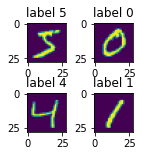

In [17]:
#训练数据集
tr_image_shape,tr_label_shape,tr_image_len,tr_label_len,tr_image_data,tr_label_data=get_data_info(train_images,train_labels)
#打印训练数据信息
print("训练图像数据集的尺寸：{}".format(tr_image_shape))
print("训练图像标签尺寸：{}".format(tr_label_shape))
print("训练图像数量：{}".format(tr_image_len))
print("训练图像标签数量：{}".format(tr_label_len))
print("第一个训练图像数据：{}".format(tr_image_data))
print("第一个训练图像标签数据：{}".format(tr_label_data))
#显示示例图像
plt.figure(figsize=(2,2))
for i in range(4):
    train_data=train_images[i]
    train_label=train_labels[i]
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.5,hspace=0.8)
    plt.imshow(train_data)
    plt.title("label {}".format(train_label),)
    
plt.show()

测试图像数据集的尺寸：(10000, 28, 28)
测试图像标签尺寸：(10000,)
测试图像数量：10000
测试图像标签数量：10000
第一个测试图像数据：[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   

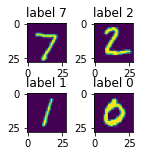

In [18]:
#测试数据集
test_image_shape,test_label_shape,test_image_len,test_label_len,test_image_data,test_label_data=get_data_info(test_images,test_labels)
#打印测试集信息
print("测试图像数据集的尺寸：{}".format(test_image_shape))
print("测试图像标签尺寸：{}".format(test_label_shape))
print("测试图像数量：{}".format(test_image_len))
print("测试图像标签数量：{}".format(test_label_len))
print("第一个测试图像数据：{}".format(test_image_data))
print("第一个测试图像标签数据：{}".format(test_label_data))
#显示示例图像
plt.figure(figsize=(2,2))
for i in range(4):
    test_data=test_images[i]
    test_label=test_labels[i]
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.5,hspace=0.8)
    plt.imshow(test_data)
    plt.title("label {}".format(test_label),)
plt.show()

## 三、卷积网络搭建

### 3.1 卷积网络结构
在 TensorFlow 中，既可以通过自定义权值的底层实现方式搭建神经网络，也可以直接
调用现成的卷积层类的高层方式快速搭建复杂网络。我们主要以 2D 卷积为例

#### 3.1.1 网络结构

In [6]:
x = tf.random.normal([2,5,5,3]) # 模拟输入，3通道，高宽为5
w = tf.random.normal([3,3,3,4]) # 需要根据[k,k,cin,cout]格式创建，4个3x3大小卷积核
out = tf.nn.conv2d(x,w,strides=1,padding=[[0,0],[0,0],[0,0],[0,0]]) # 步长为1, padding为0,
out

<tf.Tensor: shape=(2, 3, 3, 4), dtype=float32, numpy=
array([[[[ 5.4885435 ,  0.90228355, -6.2709703 ,  3.9693105 ],
         [ 4.8078513 ,  3.5669653 ,  0.16551386, -1.0962759 ],
         [ 3.9926322 ,  2.1033695 ,  2.953032  ,  0.9203242 ]],

        [[ 9.822297  , -3.0074918 ,  5.4218726 , -7.468412  ],
         [-5.150541  , -6.4236207 ,  0.46784642,  8.21922   ],
         [-0.43736246,  7.3791213 ,  0.31452167, -1.3782297 ]],

        [[-4.530431  , -3.1141782 , -3.4953809 , -2.747449  ],
         [ 2.0588088 ,  4.706859  , -2.4147637 , -3.1294575 ],
         [ 3.4048908 ,  0.9969671 ,  7.1475782 ,  8.558765  ]]],


       [[[-3.9725208 , -2.4495153 ,  6.6767287 ,  5.18695   ],
         [-6.1942177 ,  0.859389  , -1.7965742 ,  3.7790694 ],
         [-0.9641926 , -3.094137  , -0.04683375, -1.72311   ]],

        [[ 3.5896904 , -3.6610699 , -1.9830961 ,  5.926976  ],
         [ 9.207965  , -2.0757053 , -3.51452   , -5.9555707 ],
         [-2.1919165 ,  1.8030121 , -3.2687736 ,  4.92

#### 3.1.2 网络搭建
卷积分类网络借鉴最常用的VGG16，采用了五组卷积核三个全连接层的结构，VGG中使用的卷积核都是3*3的，网络结构如图所示：

<img src="https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/161599077735691721615990776296.png"/>

注：原生态的VGG16最后一个全连接层输出为1000，代表1000个类别，在本案例中只有10个类别0~9，所以将其改为10.

In [7]:
#导入必要的库
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from datetime import datetime
import  os

搭建网络：为了增加读者的知识面，在网络中加入了正则化的选项，关于正则化请读者自行查阅资料学习。

In [8]:
def VGG16():
    weight_decay = 5e-4
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))

    model.add(layers.Flatten())  # 2*2*512
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    compile_model(model)

    return model

要想训练所创建的网络需要配备合适的损失函数和优化函数，在此使用常用的Adam优化器和交叉熵损失函数。

In [9]:
def compile_model(model):
    model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"])

### 3.2 卷积网络训练

#### 3.2.1 数据预处理
在本案例中需要将数据集转换为【C，H，W】的格式，即28*28*1的图像数据。在此处读者可以自行加入适当的图像增强和变换相关的预处理。

In [10]:
#训练集预处理
train_images=train_images[:1000].reshape(-1,28,28,1)/255.0
train_label=train_labels[:1000]
#测试集预处理
test_imagees=test_images[:100].reshape(-1,28,28,1)/255.0
test_labels=test_labels[:100]

#### 3.2.2 训练网络函数

In [11]:
def train_modell(model, inputs, outputs, model_path):
    history = model.fit(
            inputs,
            outputs,
            epochs=20,
            verbose=1
            )
    # 保存参数
    model.save(model_path)

#### 3.1.2 网络训练
网络训练需要设置模型保存路径，此处需要特别注意！

In [ ]:
model=VGG16()#创建网络
model.summary()
base_name=str(datetime.now().strftime("%Y%m%d_%H_%M_%S"))
print(base_name)
#模型保存路径
model_path1 = "mnist_cnn"+base_name+".h5"
print(model_path1)
#启动训练
train_modell(model,train_images,train_label,model_path1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         2

运行结束在模型文件下保存有生成的模型文件。

<img src="https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/161599113747261901615991136442.png"/>

## 四、模型测试

### 4.1 模型加载

In [13]:
#模型加载函数
def load_model(model_save):
    model = tf.keras.models.load_model(model_save)
    return model

### 4.2 模型推理

prediction:[1]


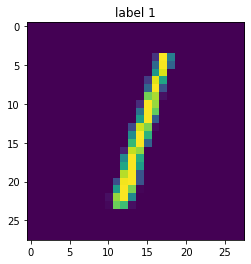

In [14]:
model=load_model(model_path1)#加载网络
test_image = tf.convert_to_tensor([test_imagees[2]])#数据转为tensor
pre = model.predict(test_image)#模型预测
pre = tf.math.argmax(pre, 1)#获取预测结果  提示one_hot的应用
#打印预测结果和标签
print("prediction:{}".format(pre))
plt.imshow(test_imagees[2])
plt.title("label {}".format(test_labels[2]),)
plt.show()